# 第3回：画像認識アルゴリズム

In [1]:
import warnings
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scienceplots
from tqdm import tqdm

np.random.seed(42)
warnings.simplefilter('ignore')

In [2]:
# GPU使用の確認
tf.test.gpu_device_name()

'/device:GPU:0'

## 準備

### mnistデータの準備

In [3]:
# # ministデータをロードして保存する
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# # データを保存する
# np.savez_compressed('./data/mnist.npz',
#                     train_images=train_images,
#                     train_labels=train_labels,
#                     test_images=test_images,
#                     test_labels=test_labels)

In [4]:
# データのロード
train_images, train_labels, test_images, test_labels = np.load('./data/mnist.npz', allow_pickle=True).values()

print(f"train_images: {train_images.shape}")
print(f"train_labels: {train_labels.shape}")
print(f"test_images: {test_images.shape}")
print(f"test_labels: {test_labels.shape}")

train_images: (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


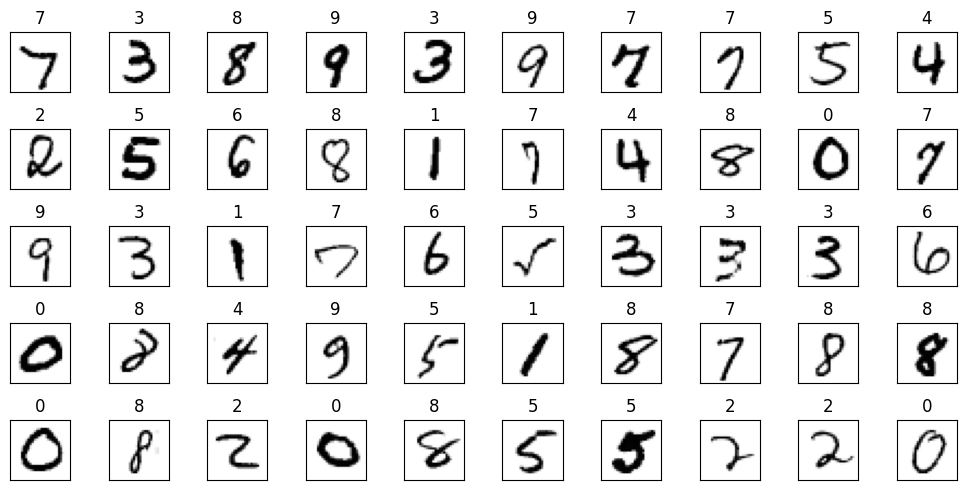

In [5]:
# 50枚の訓練データをランダムに表示する
random_index = np.random.choice(train_images.shape[0], 50, replace=False)

plt.figure(figsize=(10, 5))
for i, index in enumerate(random_index):
    plt.subplot(5, 10, i+1, xticks=[], yticks=[])
    plt.imshow(train_images[index], cmap='Greys')
    plt.title(train_labels[index], fontsize=12)

plt.tight_layout()
plt.show()

## 機械学習による手書き文字認識

In [3]:
# データのロード
train_images, train_labels, test_images, test_labels = np.load('./data/mnist.npz', allow_pickle=True).values()

### 画像データの前処理

In [4]:
# [0, 1]の範囲に正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

# 1次元に変換
train_images = train_images.reshape(-1, train_images.shape[1] * train_images.shape[2]).astype(np.float32)
test_images = test_images.reshape(-1, test_images.shape[1] * test_images.shape[2]).astype(np.float32)

print(f"train_images: {train_images.shape}")
print(f"test_images: {test_images.shape}")

train_images: (60000, 784)
test_images: (10000, 784)


### ロジスティック回帰

In [5]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [9]:
# データのロード
train_images, train_labels, test_images, test_labels = np.load('./data/mnist.npz', allow_pickle=True).values()

# [0, 1]の範囲に正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

# 1次元に変換
train_images = train_images.reshape(-1, train_images.shape[1] * train_images.shape[2]).astype(np.float32)
test_images = test_images.reshape(-1, test_images.shape[1] * test_images.shape[2]).astype(np.float32)

# デフォルト
default_sample_size = 10000
default_C = 1.0

# 学習に利用するサンプル数を変化させた場合
sample_sizes = [100, 300, 1000, 3000, 10000, 30000, 60000]

# パラメーターを変化させた場合（値が大きいほど正則化が弱くなる）
Cs = [0.1, 1.0, 10.0]

# 結果を保存するリスト
train_scores_sample = []
test_scores_sample = []
train_scores_C = []
test_scores_C = []

### ロジスティック回帰モデルを学習する(学習データのサンプル数を変化させた場合)
for sample_size in tqdm(sample_sizes):
    # 学習データをランダムに選択
    random_index = np.random.choice(train_images.shape[0], sample_size, replace=False)
    train_images_sample = train_images[random_index]
    train_labels_sample = train_labels[random_index]

    # ロジスティック回帰モデルを学習
    model = LogisticRegression(C=default_C)
    model.fit(train_images_sample, train_labels_sample)

    # 学習データとテストデータの正解率を計算
    train_score = model.score(train_images_sample, train_labels_sample)
    test_score = model.score(test_images, test_labels)

    # 結果を保存
    train_scores_sample.append(train_score)
    test_scores_sample.append(test_score)

### ロジスティック回帰モデルを学習する(パラメーターを変化させた場合)
# 学習データをランダムに選択
random_index = np.random.choice(train_images.shape[0], default_sample_size, replace=False)
train_images_sample = train_images[random_index]
train_labels_sample = train_labels[random_index]

for C in tqdm(Cs):
    # ロジスティック回帰モデルを学習
    model = LogisticRegression(C=C)
    model.fit(train_images, train_labels)

    # 学習データとテストデータの正解率を計算
    train_score = model.score(train_images, train_labels)
    test_score = model.score(test_images, test_labels)

    # 結果を保存
    train_scores_C.append(train_score)
    test_scores_C.append(test_score)

# 結果を保存
np.savez_compressed('./results_ch3/logistic_regression.npz',
                    train_scores_sample=train_scores_sample,
                    test_scores_sample=test_scores_sample,
                    train_scores_C=train_scores_C,
                    test_scores_C=test_scores_C)

100%|██████████| 3/3 [00:39<00:00, 13.27s/it]


In [23]:
# 学習に利用するサンプル数を変化させた場合
sample_sizes = [100, 300, 1000, 3000, 10000, 30000, 60000]

# パラメーターを変化させた場合（値が大きいほど正則化が弱くなる）
Cs = [0.1, 1.0, 10.0]

# 結果を読み込む
results = np.load('./results_ch3/logistic_regression.npz', allow_pickle=True)

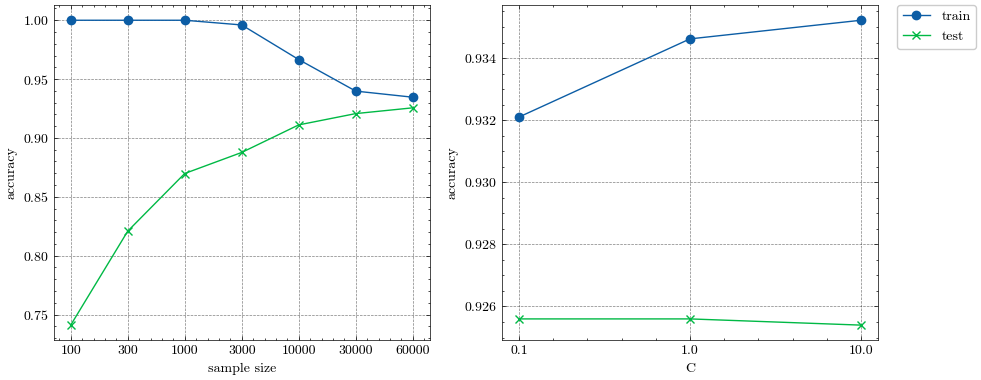

In [24]:
# 結果を取り出す
train_scores_sample = results['train_scores_sample']
test_scores_sample = results['test_scores_sample']
train_scores_C = results['train_scores_C']
test_scores_C = results['test_scores_C']

# グラフを描画する
plt.figure(figsize=(10, 4))
plt.style.use(['science', 'no-latex', 'grid'])

x = np.arange(len(sample_sizes))

# 学習データのサンプル数を変化させた場合
plt.subplot(1, 2, 1)
plt.plot(x, train_scores_sample, label='train', marker='o')
plt.plot(x, test_scores_sample, label='test', marker='x')
plt.xticks(x, sample_sizes)
plt.xlabel('sample size')
plt.ylabel('accuracy')

x = np.arange(len(Cs))

# パラメーターを変化させた場合
plt.subplot(1, 2, 2)
plt.plot(x, train_scores_C, label='train', marker='o')
plt.plot(x, test_scores_C, label='test', marker='x')
plt.xticks(x, Cs)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.savefig('./imgs_ch3/fig3-1.png', dpi=600)
plt.show()


In [7]:
# 結果を読み込み，表を作成
results = np.load('./results_ch3/logistic_regression.npz')
train_scores_sample = results['train_scores_sample']
test_scores_sample = results['test_scores_sample']
train_scores_C = results['train_scores_C']
test_scores_C = results['test_scores_C']

sample_sizes = [100, 300, 1000, 3000, 10000, 30000, 60000]
Cs = [0.1, 1.0, 10.0]

# 表を作成
table = np.zeros((len(sample_sizes) + 1, len(Cs) + 1))
table[0, 1:] = Cs
table[1:, 0] = sample_sizes
table[1:, 1:] = np.array(test_scores_sample).reshape(-1, 1)

# 表を表示
print(table)

[[0.000e+00 1.000e-01 1.000e+00 1.000e+01]
 [1.000e+02 7.410e-01 7.410e-01 7.410e-01]
 [3.000e+02 8.208e-01 8.208e-01 8.208e-01]
 [1.000e+03 8.698e-01 8.698e-01 8.698e-01]
 [3.000e+03 8.877e-01 8.877e-01 8.877e-01]
 [1.000e+04 9.111e-01 9.111e-01 9.111e-01]
 [3.000e+04 9.207e-01 9.207e-01 9.207e-01]
 [6.000e+04 9.256e-01 9.256e-01 9.256e-01]]


### ランダムフォレスト

In [11]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [12]:
# データのロード
train_images, train_labels, test_images, test_labels = np.load('./data/mnist.npz', allow_pickle=True).values()

# [0, 1]の範囲に正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

# 1次元に変換
train_images = train_images.reshape(-1, train_images.shape[1] * train_images.shape[2]).astype(np.float32)
test_images = test_images.reshape(-1, test_images.shape[1] * test_images.shape[2]).astype(np.float32)

# デフォルト
default_sample_size = 10000
default_n_estimators = 100
default_max_depth = None
default_criterion = 'gini'

# 学習に利用するサンプル数を変化させた場合
sample_sizes = [100, 300, 1000, 3000, 10000, 30000, 60000]

# ハイパーパラメーターを変化させた場合
n_estimators = [10, 50, 100, 200, 500] # 決定木の数
max_depths = [3, 5, 10, 20, None] # 決定木の深さ
cirterions = ['gini', 'entropy'] # 不純度の指標

# 結果を保存するリスト
train_scores_sample, test_scores_sample = [], []
train_scores_n_estimators, test_scores_n_estimators = [], []
train_scores_max_depth, test_scores_max_depth = [], []
train_scores_cirterion, test_scores_cirterion = [], []

### ランダムフォレストモデルを学習する(学習データのサンプル数を変化させた場合)
for sample_size in tqdm(sample_sizes):
    # 学習データをランダムに選択
    random_index = np.random.choice(train_images.shape[0], sample_size, replace=False)
    train_images_sample = train_images[random_index]
    train_labels_sample = train_labels[random_index]

    # ランダムフォレストモデルを学習
    model = RandomForestClassifier(n_estimators=default_n_estimators,
                                   max_depth=default_max_depth,
                                   criterion=default_criterion)
    model.fit(train_images_sample, train_labels_sample)

    # 学習データとテストデータの正解率を計算
    train_score = model.score(train_images_sample, train_labels_sample)
    test_score = model.score(test_images, test_labels)

    # 結果を保存
    train_scores_sample.append(train_score)
    test_scores_sample.append(test_score)

### ランダムフォレストモデルを学習する(ハイパーパラメーターを変化させた場合)
# 学習データをランダムに選択
random_index = np.random.choice(train_images.shape[0], default_sample_size, replace=False)
train_images_sample = train_images[random_index]
train_labels_sample = train_labels[random_index]

for n_estimator in tqdm(n_estimators):
    # ランダムフォレストモデルを学習
    model = RandomForestClassifier(n_estimators=n_estimator,
                                   max_depth=default_max_depth,
                                   criterion=default_criterion)
    model.fit(train_images, train_labels)

    # 学習データとテストデータの正解率を計算
    train_score = model.score(train_images, train_labels)
    test_score = model.score(test_images, test_labels)

    # 結果を保存
    train_scores_n_estimators.append(train_score)
    test_scores_n_estimators.append(test_score)

for max_depth in tqdm(max_depths):
    # ランダムフォレストモデルを学習
    model = RandomForestClassifier(n_estimators=default_n_estimators,
                                   max_depth=max_depth,
                                   criterion=default_criterion)
    model.fit(train_images, train_labels)

    # 学習データとテストデータの正解率を計算
    train_score = model.score(train_images, train_labels)
    test_score = model.score(test_images, test_labels)

    # 結果を保存
    train_scores_max_depth.append(train_score)
    test_scores_max_depth.append(test_score)

for criterion in tqdm(cirterions):
    # ランダムフォレストモデルを学習
    model = RandomForestClassifier(n_estimators=default_n_estimators,
                                   max_depth=default_max_depth,
                                   criterion=criterion)
    model.fit(train_images, train_labels)

    # 学習データとテストデータの正解率を計算
    train_score = model.score(train_images, train_labels)
    test_score = model.score(test_images, test_labels)

    # 結果を保存
    train_scores_cirterion.append(train_score)
    test_scores_cirterion.append(test_score)

# 結果を保存
np.savez_compressed('./results_ch3/random_forest.npz',
                    train_scores_sample=train_scores_sample,
                    test_scores_sample=test_scores_sample,
                    train_scores_n_estimators=train_scores_n_estimators,
                    test_scores_n_estimators=test_scores_n_estimators,
                    train_scores_max_depth=train_scores_max_depth,
                    test_scores_max_depth=test_scores_max_depth,
                    train_scores_cirterion=train_scores_cirterion,
                    test_scores_cirterion=test_scores_cirterion)

100%|██████████| 2/2 [02:17<00:00, 68.70s/it]


In [25]:
# 学習に利用するサンプル数を変化させた場合
sample_sizes = [100, 300, 1000, 3000, 10000, 30000, 60000]

# ハイパーパラメーターを変化させた場合
n_estimators = [10, 50, 100, 200, 500]
max_depths = [3, 5, 10, 20, None]
cirterions = ['gini', 'entropy']

# 結果を読み込む
results = np.load('./results_ch3/random_forest.npz', allow_pickle=True)

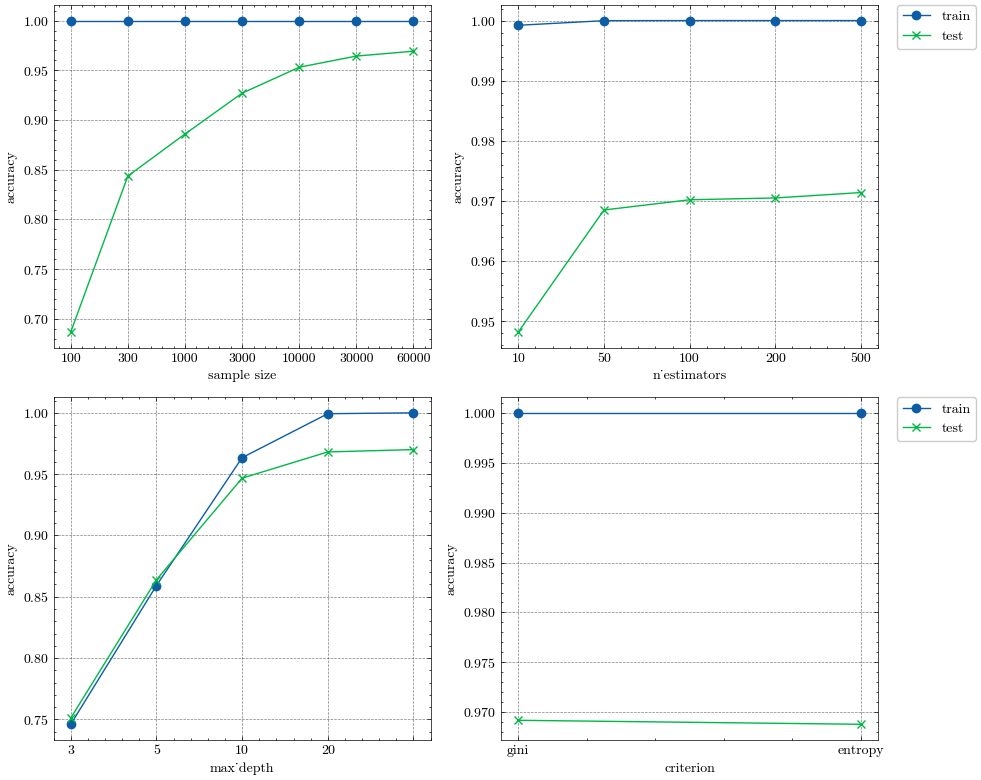

In [26]:
# 結果を取り出す
train_scores_sample = results['train_scores_sample']
test_scores_sample = results['test_scores_sample']
train_scores_n_estimators = results['train_scores_n_estimators']
test_scores_n_estimators = results['test_scores_n_estimators']
train_scores_max_depth = results['train_scores_max_depth']
test_scores_max_depth = results['test_scores_max_depth']
train_scores_cirterion = results['train_scores_cirterion']
test_scores_cirterion = results['test_scores_cirterion']

# グラフを描画する
plt.figure(figsize=(10, 8))
plt.style.use(['science', 'no-latex', 'grid'])

x = np.arange(len(sample_sizes))

# 学習データのサンプル数を変化させた場合
plt.subplot(2, 2, 1)
plt.plot(x, train_scores_sample, label='train', marker='o')
plt.plot(x, test_scores_sample, label='test', marker='x')
plt.xticks(x, sample_sizes)
plt.xlabel('sample size')
plt.ylabel('accuracy')

x = np.arange(len(n_estimators))

# ハイパーパラメーターを変化させた場合
plt.subplot(2, 2, 2)
plt.plot(x, train_scores_n_estimators, label='train', marker='o')
plt.plot(x, test_scores_n_estimators, label='test', marker='x')
plt.xticks(x, n_estimators)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

x = np.arange(len(max_depths))

# ハイパーパラメーターを変化させた場合
plt.subplot(2, 2, 3)
plt.plot(x, train_scores_max_depth, label='train', marker='o')
plt.plot(x, test_scores_max_depth, label='test', marker='x')
plt.xticks(x, max_depths)
plt.xlabel('max_depth')
plt.ylabel('accuracy')

x = np.arange(len(cirterions))

# ハイパーパラメーターを変化させた場合
plt.subplot(2, 2, 4)
plt.plot(x, train_scores_cirterion, label='train', marker='o')
plt.plot(x, test_scores_cirterion, label='test', marker='x')
plt.xticks(x, cirterions)
plt.xlabel('criterion')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.savefig('./imgs_ch3/fig3-2.png', dpi=600)
plt.show()


### サポートベクターマシン

In [14]:
from sklearn import metrics
from sklearn.svm import SVC

In [15]:
# データのロード
train_images, train_labels, test_images, test_labels = np.load('./data/mnist.npz', allow_pickle=True).values()

# [0, 1]の範囲に正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

# 1次元に変換
train_images = train_images.reshape(-1, train_images.shape[1] * train_images.shape[2]).astype(np.float32)
test_images = test_images.reshape(-1, test_images.shape[1] * test_images.shape[2]).astype(np.float32)

# デフォルト
default_sample_size = 10000
default_C = 1.0
default_kernel = 'rbf'
default_decision_function_shape = 'ovr'

# 学習に利用するサンプル数を変化させた場合
sample_sizes = [100, 300, 1000, 3000, 10000, 30000, 60000]

# ハイパーパラメーターを変化させた場合
Cs = [0.1, 1.0, 10.0] # 正則化強度の逆数（値が大きいほど正則化が弱くなる）
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] # カーネル関数
decision_function_shapes = ['ovr', 'ovo'] # 多クラス分類の手法

# 結果を保存するリスト
train_scores_sample, test_scores_sample = [], []
train_scores_C, test_scores_C = [], []
train_scores_kernel, test_scores_kernel = [], []
train_scores_decision_function_shape, test_scores_decision_function_shape = [], []

### SVMモデルを学習する(学習データのサンプル数を変化させた場合)
for sample_size in tqdm(sample_sizes):
    # 学習データをランダムに選択
    random_index = np.random.choice(train_images.shape[0], sample_size, replace=False)
    train_images_sample = train_images[random_index]
    train_labels_sample = train_labels[random_index]

    # SVMモデルを学習
    model = SVC(C=default_C,
                kernel=default_kernel,
                decision_function_shape=default_decision_function_shape)
    model.fit(train_images_sample, train_labels_sample)

    # 学習データとテストデータの正解率を計算
    train_score = model.score(train_images_sample, train_labels_sample)
    test_score = model.score(test_images, test_labels)

    # 結果を保存
    train_scores_sample.append(train_score)
    test_scores_sample.append(test_score)


### SVMモデルを学習する(ハイパーパラメーターを変化させた場合)
# 学習データをランダムに選択
random_index = np.random.choice(train_images.shape[0], default_sample_size, replace=False)
train_images_sample = train_images[random_index]
train_labels_sample = train_labels[random_index]

for C in tqdm(Cs):
    # SVMモデルを学習
    model = SVC(C=C,
                kernel=default_kernel,
                decision_function_shape=default_decision_function_shape)
    model.fit(train_images, train_labels)

    # 学習データとテストデータの正解率を計算
    train_score = model.score(train_images, train_labels)
    test_score = model.score(test_images, test_labels)

    # 結果を保存
    train_scores_C.append(train_score)
    test_scores_C.append(test_score)

for kernel in tqdm(kernels):
    # SVMモデルを学習
    model = SVC(C=default_C,
                kernel=kernel,
                decision_function_shape=default_decision_function_shape)
    model.fit(train_images, train_labels)

    # 学習データとテストデータの正解率を計算
    train_score = model.score(train_images, train_labels)
    test_score = model.score(test_images, test_labels)

    # 結果を保存
    train_scores_kernel.append(train_score)
    test_scores_kernel.append(test_score)

for decision_function_shape in tqdm(decision_function_shapes):
    # SVMモデルを学習
    model = SVC(C=default_C,
                kernel=default_kernel,
                decision_function_shape=decision_function_shape)
    model.fit(train_images, train_labels)

    # 学習データとテストデータの正解率を計算
    train_score = model.score(train_images, train_labels)
    test_score = model.score(test_images, test_labels)

    # 結果を保存
    train_scores_decision_function_shape.append(train_score)
    test_scores_decision_function_shape.append(test_score)

# 結果を保存
np.savez_compressed('./results_ch3/svm.npz',
                    train_scores_sample=train_scores_sample,
                    test_scores_sample=test_scores_sample,
                    train_scores_C=train_scores_C,
                    test_scores_C=test_scores_C,
                    train_scores_kernel=train_scores_kernel,
                    test_scores_kernel=test_scores_kernel,
                    train_scores_decision_function_shape=train_scores_decision_function_shape,
                    test_scores_decision_function_shape=test_scores_decision_function_shape)

100%|██████████| 2/2 [24:10<00:00, 725.13s/it]


In [29]:
# 学習に利用するサンプル数を変化させた場合
sample_sizes = [100, 300, 1000, 3000, 10000, 30000, 60000]

# ハイパーパラメーターを変化させた場合
Cs = [0.1, 1.0, 10.0]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
decision_function_shapes = ['ovr', 'ovo']

# 結果を読み込む
results = np.load('./results_ch3/svm.npz', allow_pickle=True)

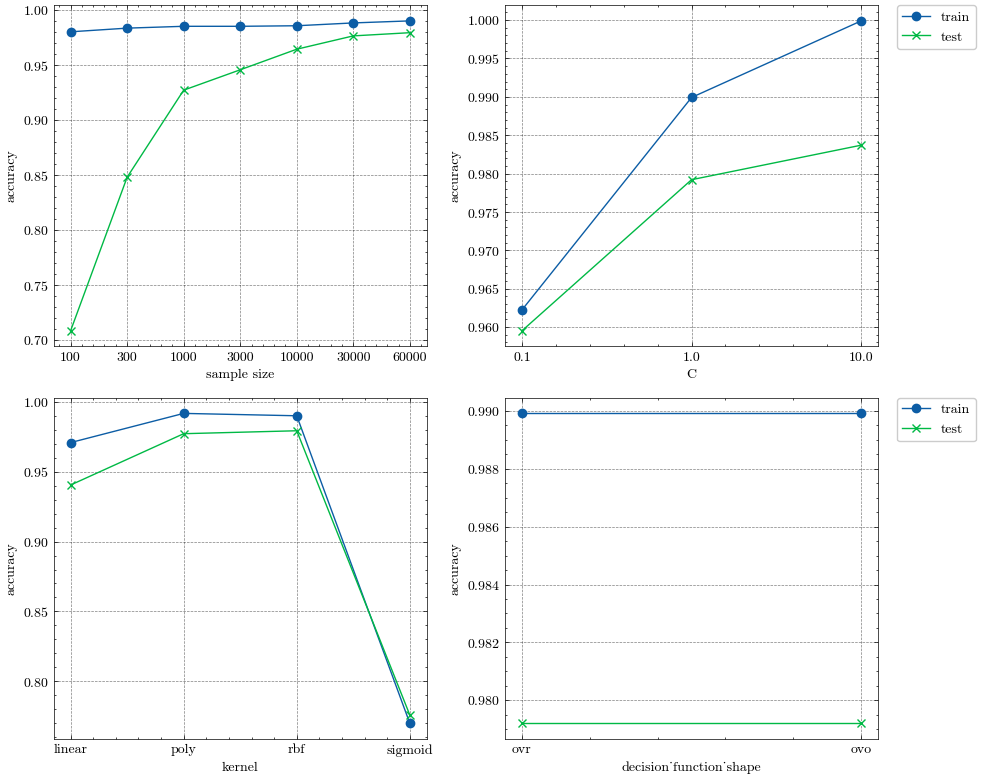

In [30]:
# 結果を取り出す
train_scores_sample = results['train_scores_sample']
test_scores_sample = results['test_scores_sample']
train_scores_C = results['train_scores_C']
test_scores_C = results['test_scores_C']
train_scores_kernel = results['train_scores_kernel']
test_scores_kernel = results['test_scores_kernel']
train_scores_decision_function_shape = results['train_scores_decision_function_shape']
test_scores_decision_function_shape = results['test_scores_decision_function_shape']

# グラフを描画する
plt.figure(figsize=(10, 8))
plt.style.use(['science', 'no-latex', 'grid'])

x = np.arange(len(sample_sizes))

# 学習データのサンプル数を変化させた場合
plt.subplot(2, 2, 1)
plt.plot(x, train_scores_sample, label='train', marker='o')
plt.plot(x, test_scores_sample, label='test', marker='x')
plt.xticks(x, sample_sizes)
plt.xlabel('sample size')
plt.ylabel('accuracy')

x = np.arange(len(Cs))

# ハイパーパラメーターを変化させた場合
plt.subplot(2, 2, 2)
plt.plot(x, train_scores_C, label='train', marker='o')
plt.plot(x, test_scores_C, label='test', marker='x')
plt.xticks(x, Cs)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

x = np.arange(len(kernels))

# ハイパーパラメーターを変化させた場合
plt.subplot(2, 2, 3)
plt.plot(x, train_scores_kernel, label='train', marker='o')
plt.plot(x, test_scores_kernel, label='test', marker='x')
plt.xticks(x, kernels)
plt.xlabel('kernel')
plt.ylabel('accuracy')

x = np.arange(len(decision_function_shapes))

# ハイパーパラメーターを変化させた場合
plt.subplot(2, 2, 4)
plt.plot(x, train_scores_decision_function_shape, label='train', marker='o')
plt.plot(x, test_scores_decision_function_shape, label='test', marker='x')
plt.xticks(x, decision_function_shapes)
plt.xlabel('decision_function_shape')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.savefig('./imgs_ch3/fig3-3.png', dpi=600)
plt.show()